In [1]:
import numpy as np
import pandas as pd

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
bnifty=pd.read_csv("/content/drive/MyDrive/pairs trading/bank_nifty_new.csv")
nifty=pd.read_csv("/content/drive/MyDrive/pairs trading/NIFTY50.csv")

In [ ]:
bnifty.head()

,symbol,datetime,open,high,low,close,volume
0,NIFTYBANK,02-01-2017 09:15,18248.20,18248.20,18175.90,18181.85,0
1,NIFTYBANK,02-01-2017 09:16,18182.25,18194.70,18179.95,18184.95,0
2,NIFTYBANK,02-01-2017 09:17,18184.70,18189.25,18133.80,18135.10,0
3,NIFTYBANK,02-01-2017 09:18,18132.35,18141.55,18118.55,18138.95,0
4,NIFTYBANK,02-01-2017 09:19,18139.50,18142.55,18120.45,18123.95,0


In [ ]:
nifty.head()

,symbol,datetime,open,high,low,close,volume
0,NIFTY50,2017-07-17 09:14:00,9908.15,9908.15,9908.15,9908.15,0
1,NIFTY50,2017-07-17 09:15:00,9908.15,9908.50,9900.50,9900.50,0
2,NIFTY50,2017-07-17 09:16:00,9901.90,9905.85,9899.50,9904.35,0
3,NIFTY50,2017-07-17 09:17:00,9904.45,9906.80,9903.30,9903.30,0
4,NIFTY50,2017-07-17 09:18:00,9903.35,9908.90,9903.35,9907.80,0


In [ ]:
nifty.set_index(pd.to_datetime(nifty.datetime),inplace=True
              )

In [ ]:
bnifty.set_index(pd.to_datetime(bnifty.datetime),inplace=True
              )

In [ ]:
nifty.shape

(483465, 7)

In [ ]:
bnifty.shape

(532733, 7)

In [ ]:
def resample(df, x = '2h'):

    try:
        df.drop(columns = ['symbol', 'volume'], axis = 1, inplace = True)
    except:
        pass

    if 'open' in df.columns:
        agg = { "open": "first",
                "high": "max",
                "low": "min",
                "close": "last"
              }
    else:
        agg = { "Open": "first",
                "High": "max",
                "Low": "min",
                "Close": "last"
              }
    try:
        df['datetime']= pd.to_datetime(df['datetime'] ,format='%d-%m-%Y %H:%M')  #02-01-2017  09:15:00
    except:
        df['datetime']= pd.to_datetime(df['datetime'] ,format='%Y-%m-%d %H:%M')
    df= df.set_index('datetime')
    df = df.between_time('09:15:00', '15:29:00')
    df = df.resample('{}'.format(x), origin='start').agg(agg).dropna()
    return df


In [ ]:
nfty=resample(nifty)

In [ ]:
bnfty=resample(bnifty)

In [ ]:
bnfty.head()

,open,high,low,close
datetime,,,,
2017-01-02 09:15:00,18248.20,18248.20,17874.10,17903.60
2017-01-02 11:15:00,17903.20,17951.15,17845.35,17947.15
2017-01-02 13:15:00,17948.15,18052.85,17928.10,17963.25
2017-01-02 15:15:00,17962.75,17983.75,17957.60,17979.20
2017-01-03 09:15:00,17998.60,18115.00,17831.75,18100.20


In [ ]:
bnfty.rename(columns={"open":"bopen","high":"bhigh","low":"blow","close":"bclose"},inplace=True)

In [ ]:
nfty.head()

,open,high,low,close
datetime,,,,
2017-07-17 09:15:00,9908.15,9920.30,9894.85,9915.25
2017-07-17 11:15:00,9915.40,9916.55,9902.60,9907.05
2017-07-17 13:15:00,9907.25,9928.20,9904.30,9919.90
2017-07-17 15:15:00,9919.05,9921.30,9910.40,9913.65
2017-07-18 09:15:00,9863.50,9884.45,9842.45,9853.10


In [ ]:
bnfty.head()

,bopen,bhigh,blow,bclose
datetime,,,,
2017-01-02 09:15:00,18248.20,18248.20,17874.10,17903.60
2017-01-02 11:15:00,17903.20,17951.15,17845.35,17947.15
2017-01-02 13:15:00,17948.15,18052.85,17928.10,17963.25
2017-01-02 15:15:00,17962.75,17983.75,17957.60,17979.20
2017-01-03 09:15:00,17998.60,18115.00,17831.75,18100.20


In [ ]:
nfty.dropna(inplace=True)

In [ ]:
nfty.shape

(5152, 4)

In [ ]:
bnfty.dropna(inplace=True)

In [ ]:
bnfty.shape

(5684, 4)

In [ ]:
df=pd.concat([nfty,bnfty],axis=1)

In [ ]:
df.shape

(5684, 8)

In [ ]:
df.head(50)

,open,high,low,close,bopen,bhigh,blow,bclose
datetime,,,,,,,,
2017-01-02 09:15:00,NaN,NaN,NaN,NaN,18248.20,18248.20,17874.10,17903.60
2017-01-02 11:15:00,NaN,NaN,NaN,NaN,17903.20,17951.15,17845.35,17947.15
2017-01-02 13:15:00,NaN,NaN,NaN,NaN,17948.15,18052.85,17928.10,17963.25
2017-01-02 15:15:00,NaN,NaN,NaN,NaN,17962.75,17983.75,17957.60,17979.20
2017-01-03 09:15:00,NaN,NaN,NaN,NaN,17998.60,18115.00,17831.75,18100.20
2017-01-03 11:15:00,NaN,NaN,NaN,NaN,18100.55,18106.85,18044.45,18064.65
2017-01-03 13:15:00,NaN,NaN,NaN,NaN,18063.60,18093.55,17958.45,18033.70
2017-01-03 15:15:00,NaN,NaN,NaN,NaN,18033.65,18047.90,18024.15,18043.60
2017-01-04 09:15:00,NaN,NaN,NaN,NaN,18029.95,18092.50,17961.55,17984.00


In [ ]:
df.dropna(inplace=True)

In [ ]:
df.head(50)

,open,high,low,close,bopen,bhigh,blow,bclose
datetime,,,,,,,,
2017-07-17 09:15:00,9908.15,9920.30,9894.85,9915.25,23999.70,24021.80,23914.40,23997.35
2017-07-17 11:15:00,9915.40,9916.55,9902.60,9907.05,23995.70,24003.65,23963.75,23985.40
2017-07-17 13:15:00,9907.25,9928.20,9904.30,9919.90,23987.55,24064.70,23965.50,23996.00
2017-07-17 15:15:00,9919.05,9921.30,9910.40,9913.65,24000.80,24039.45,23992.35,24030.30
2017-07-18 09:15:00,9863.50,9884.45,9842.45,9853.10,23951.05,24129.50,23950.00,24057.25
2017-07-18 11:15:00,9853.35,9862.85,9842.90,9842.95,24056.80,24106.55,24048.20,24060.90
2017-07-18 13:15:00,9844.25,9870.80,9817.95,9829.85,24061.20,24146.80,24000.85,24028.50
2017-07-18 15:15:00,9825.95,9828.45,9824.20,9828.45,24029.00,24033.05,24005.05,24015.50
2017-07-19 09:15:00,9866.80,9876.15,9853.90,9872.80,24069.05,24146.25,24057.65,24120.05


In [ ]:
df.shape

(5152, 8)

In [ ]:
df["spread"]=np.log(df.bclose*25)-np.log(df.close*50)

In [ ]:
df.head()

,open,high,low,close,bopen,bhigh,blow,bclose,spread
datetime,,,,,,,,,
2017-07-17 09:15:00,9908.15,9920.30,9894.85,9915.25,23999.70,24021.80,23914.40,23997.35,0.190722
2017-07-17 11:15:00,9915.40,9916.55,9902.60,9907.05,23995.70,24003.65,23963.75,23985.40,0.191052
2017-07-17 13:15:00,9907.25,9928.20,9904.30,9919.90,23987.55,24064.70,23965.50,23996.00,0.190197
2017-07-17 15:15:00,9919.05,9921.30,9910.40,9913.65,24000.80,24039.45,23992.35,24030.30,0.192256
2017-07-18 09:15:00,9863.50,9884.45,9842.45,9853.10,23951.05,24129.50,23950.00,24057.25,0.199503


In [ ]:
df["s_roll"]=df.spread.rolling(20).mean()
df["s_std"]=df.spread.rolling(20).std()

In [ ]:
df.head(20)

,open,high,low,close,bopen,bhigh,blow,bclose,spread,s_roll,s_std
datetime,,,,,,,,,,,
2017-07-17 09:15:00,9908.15,9920.30,9894.85,9915.25,23999.70,24021.80,23914.40,23997.35,0.190722,NaN,NaN
2017-07-17 11:15:00,9915.40,9916.55,9902.60,9907.05,23995.70,24003.65,23963.75,23985.40,0.191052,NaN,NaN
2017-07-17 13:15:00,9907.25,9928.20,9904.30,9919.90,23987.55,24064.70,23965.50,23996.00,0.190197,NaN,NaN
2017-07-17 15:15:00,9919.05,9921.30,9910.40,9913.65,24000.80,24039.45,23992.35,24030.30,0.192256,NaN,NaN
2017-07-18 09:15:00,9863.50,9884.45,9842.45,9853.10,23951.05,24129.50,23950.00,24057.25,0.199503,NaN,NaN
2017-07-18 11:15:00,9853.35,9862.85,9842.90,9842.95,24056.80,24106.55,24048.20,24060.90,0.200685,NaN,NaN
2017-07-18 13:15:00,9844.25,9870.80,9817.95,9829.85,24061.20,24146.80,24000.85,24028.50,0.200670,NaN,NaN
2017-07-18 15:15:00,9825.95,9828.45,9824.20,9828.45,24029.00,24033.05,24005.05,24015.50,0.200271,NaN,NaN
2017-07-19 09:15:00,9866.80,9876.15,9853.90,9872.80,24069.05,24146.25,24057.65,24120.05,0.200113,NaN,NaN


In [ ]:
df.dropna(inplace=True)

In [ ]:
df["z_score"]=(df["spread"]-df["s_roll"])/df["s_std"]

In [ ]:
df.head()

,open,high,low,close,bopen,bhigh,blow,bclose,spread,s_roll,s_std,z_score
datetime,,,,,,,,,,,,
2017-07-21 15:15:00,9917.05,9922.95,9914.15,9914.15,24258.40,24289.15,24251.75,24278.15,0.202467,0.199272,0.004520,0.706854
2017-07-24 09:15:00,9924.65,9968.00,9919.90,9964.95,24316.35,24415.55,24237.05,24403.25,0.202495,0.199860,0.004094,0.643530
2017-07-24 11:15:00,9964.50,9969.60,9956.70,9960.95,24402.25,24450.45,24343.25,24408.90,0.203128,0.200464,0.003586,0.742931
2017-07-24 13:15:00,9958.95,9980.40,9951.65,9966.20,24411.05,24457.45,24378.80,24422.15,0.203144,0.201112,0.002692,0.755000
2017-07-24 15:15:00,9963.95,9972.60,9963.95,9965.55,24424.40,24442.75,24408.85,24421.85,0.203197,0.201659,0.001741,0.883338


In [ ]:
import matplotlib.pyplot as plt


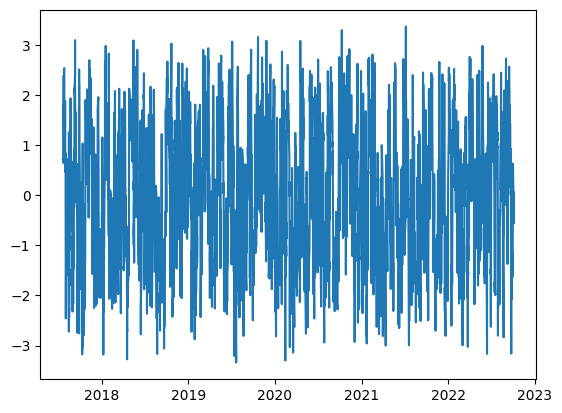

In [ ]:
plt.plot(df["z_score"])
plt.show()

In [ ]:
df["z_score"]=df["z_score"].shift(1);

In [ ]:
df.dropna(inplace=True)

In [ ]:
fin=pd.DataFrame(columns=["type","entry_time","exit_time","entry_price_bnf","exit_price_bnf","entry_price_nft","exit_price_nft","pnl"])
lower_thresh=1
upper_thresh=1
max_pnl=-1000000
for lower in np.arange(0,2,0.1):
  for higher in np.arange(lower+0.1,2,0.1):
    pnl=pd.DataFrame(columns=["type","entry_time","exit_time","entry_price_bnf","exit_price_bnf","entry_price_nft","exit_price_nft","pnl"])
    trade=0
    entrytime=0
    entryprice_bnf=0
    entryprice_nft=0
    exitprice_bnf=0
    exitprice_nft=0
    for indx,val in df.iterrows():
      # print(val)
      # break;
      if trade==0 and val.z_score>higher:
        trade=-1
        entrytime=indx
        entryprice_bnf=val.bclose
        entryprice_nft=val.close
      if trade==0 and val.z_score<-higher:
        trade=1
        entrytime=indx
        entryprice_bnf=val.bclose
        entryprice_nft=val.close
      if trade==-1 and val.z_score<lower:
        trade=0
        profit=(entryprice_bnf-val.bclose)*25-(val.close-entryprice_nft)*50
        pnl.loc[len(pnl.index)]=["short_bnf-short_nifty",entrytime,indx,entryprice_nft,val.close,entryprice_bnf,val.bclose,-profit]
        continue
      if trade==1 and val.z_score>-lower:
        trade=0
        profit=-((entryprice_bnf-val.bclose)*25-(val.close-entryprice_nft)*50)
        pnl.loc[len(pnl.index)]=["long_bnf-long_nifty",entrytime,indx,entryprice_nft,val.close,entryprice_bnf,val.bclose,profit]
    if max_pnl<pnl["pnl"].sum() :
      fin=pnl
      upper_thresh=higher
      lower_thresh=lower
      max_pnl=pnl["pnl"].sum()
      print(max_pnl)

899747.4999999986


In [ ]:
print(upper_thresh)
print(lower_thresh)

0.1
0.0


In [ ]:
fin["pnl"].sum()

899747.4999999986

In [ ]:
fin.shape

(411, 8)

In [ ]:
fin.to_csv("2hrstrade_log.csv")

In [ ]:
# sbhf lnf 222505
# 1,1.1
# sbnf snf 899747
# 0,0.1
# lbnf lnf -ve
# lbnf snf 24653
# 0,1.6